In [ ]:
#Credit Scoring Model

# Develop a credit scoring model to predict the creditworthiness of individuals based on historicalfinancial data.
# Utilize classification algorithms and assess the model's accuracy.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/credit_risk_dataset.csv")
df = df.dropna()

In [ ]:
features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']
X = df[features]
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8276885474860335

Confusion Matrix:
 [[4237  206]
 [ 781  504]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.90      4443
           1       0.71      0.39      0.51      1285

    accuracy                           0.83      5728
   macro avg       0.78      0.67      0.70      5728
weighted avg       0.81      0.83      0.81      5728



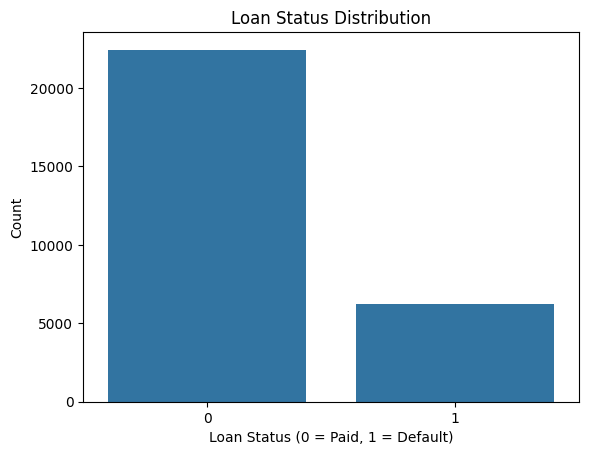

In [ ]:
sns.countplot(x='loan_status', data=df)
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status (0 = Paid, 1 = Default)")
plt.ylabel("Count")
plt.show()


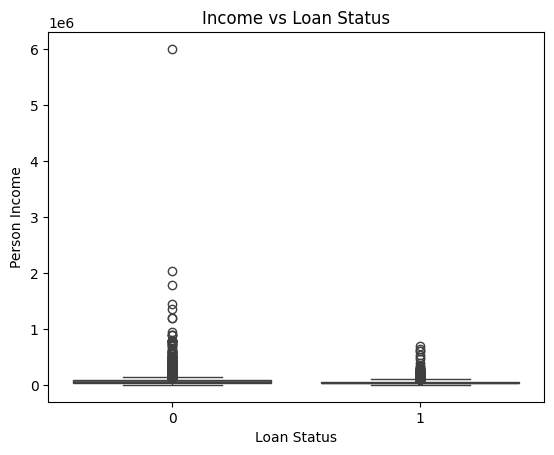

In [ ]:
sns.boxplot(x='loan_status', y='person_income', data=df)
plt.title("Income vs Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Person Income")
plt.show()

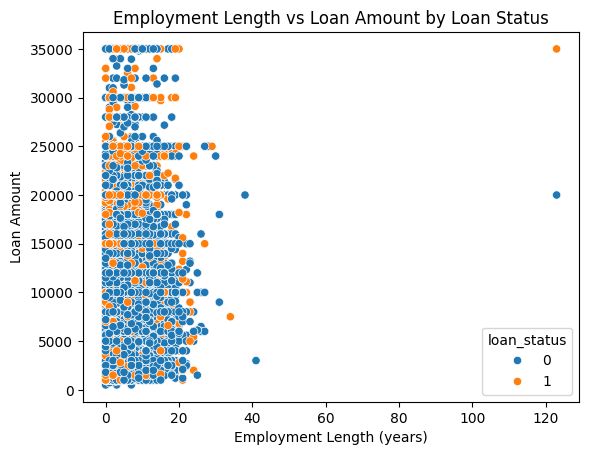

In [ ]:
sns.scatterplot(x='person_emp_length', y='loan_amnt', hue='loan_status', data=df)
plt.title("Employment Length vs Loan Amount by Loan Status")
plt.xlabel("Employment Length (years)")
plt.ylabel("Loan Amount")
plt.show()

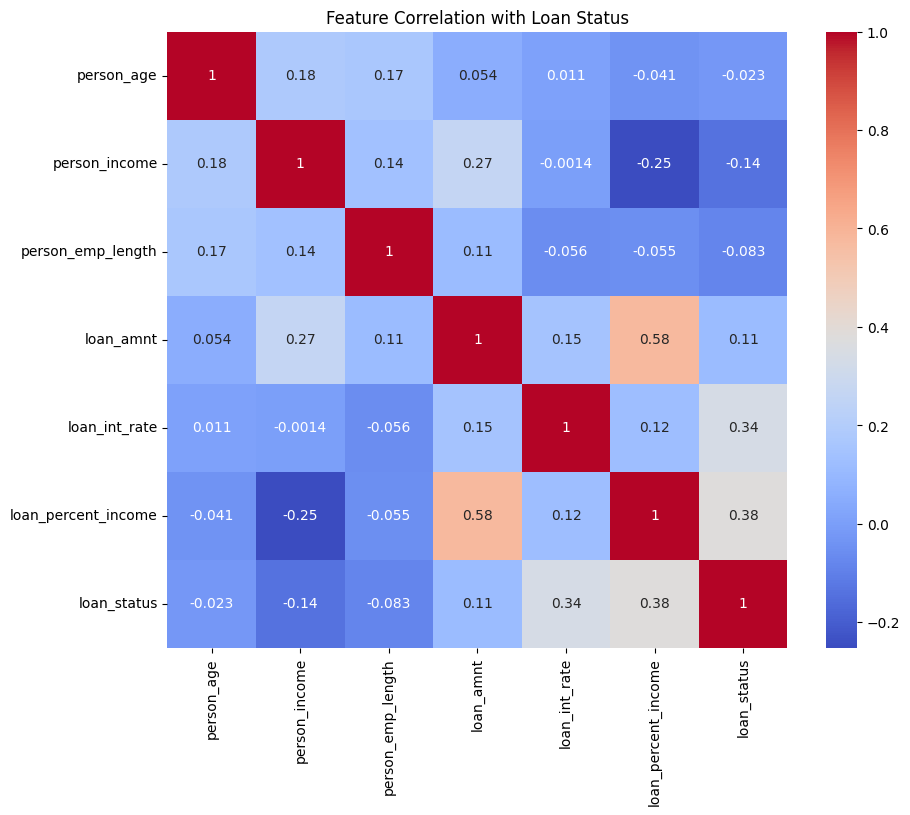

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df[features + ['loan_status']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Loan Status")
plt.show()

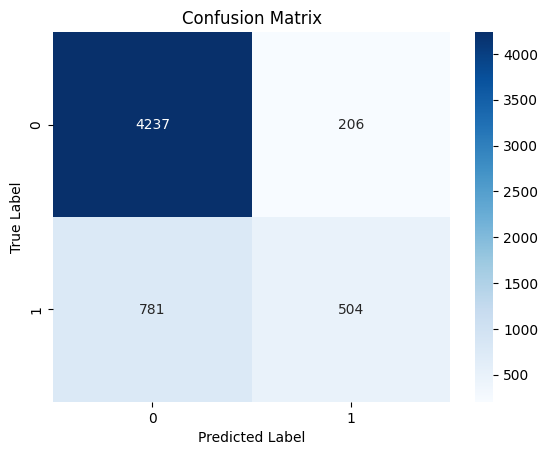

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
